performing element wise operations on arrays

In [5]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

print("element wise operations on arrays", arr * 7)

element wise operations on arrays [ 7 14 21 28 35]


comparing loop vs vectorized execution time

In [6]:
big_arr = np.arange(100000)
import time

start_time = time.time()
[x*7 for x in big_arr]
end_time = time.time()
print(f"Time taken for loop: {end_time - start_time} seconds")

start_time = time.time()
big_arr*7
end_time = time.time()
print(f"Time taken for vectorized operation: {end_time - start_time} seconds")


Time taken for loop: 0.02393507957458496 seconds
Time taken for vectorized operation: 0.00039696693420410156 seconds


loading provided sample data using pandas

In [7]:
!pip install pandas

In [1]:
import pandas as pd
#get the current working directory
import os

#read the sample data
df = pd.read_csv("../data/starter_data.csv")
df


,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05
5,C,30,2025-08-06
6,A,11,2025-08-07
7,B,14,2025-08-08
8,C,28,2025-08-09
9,A,13,2025-08-10


using info() to get a quick overview of the dataset and using head() to print the first few rows


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [3]:
df.head(6)

,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05
5,C,30,2025-08-06


using describe to get statistical metrics for numerical columns. from using info() we find that the only numerical column is value so applying describe on value column or only describe will also give the same result on the entire dataframe.

In [4]:
numeric_stats = df["value"].describe()
numeric_stats

count    10.000000
mean     17.600000
std       7.381659
min      10.000000
25%      12.250000
50%      14.500000
75%      23.250000
max      30.000000
Name: value, dtype: float64

grouping data by category and calculating mean value for each category to get a better understanding of each category of data



In [5]:
data_aggregated = df.groupby("category").mean(numeric_only=True).reset_index()
data_aggregated



,category,value
0,A,11.500000
1,B,15.666667
2,C,27.666667


saving the summary statistics to a csv file

In [6]:

summary_stats = []

summary_stats.append(numeric_stats.reset_index())

summary_stats.append(data_aggregated)

summary_stats = pd.concat(summary_stats, axis=0, ignore_index=True)
summary_stats






,index,value,category
0,count,10.000000,NaN
1,mean,17.600000,NaN
2,std,7.381659,NaN
3,min,10.000000,NaN
4,25%,12.250000,NaN
5,50%,14.500000,NaN
6,75%,23.250000,NaN
7,max,30.000000,NaN
8,NaN,11.500000,A
9,NaN,15.666667,B


In [7]:
summary_stats.to_csv("../data/processed/summary.csv", index=False)


creating a histogram to visualize the distribution of the data for value column and saving the histogram to a png file


In [47]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 11.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


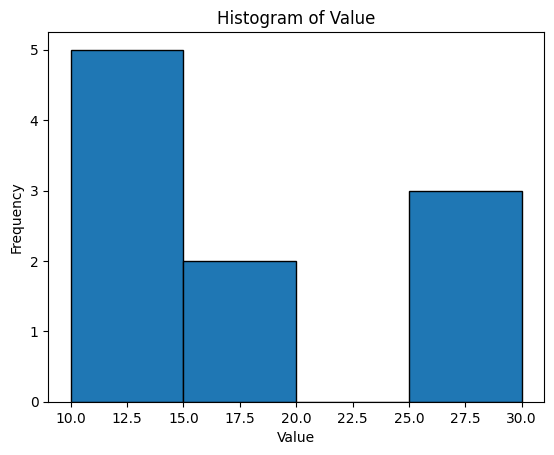

In [9]:
import matplotlib.pyplot as plt

plt.hist(df["value"], bins=[10, 15, 20, 25, 30], edgecolor="black")
plt.title("Histogram of Value")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.savefig("../data/processed/value_column_histogram.png")
plt.show()

importing function from src/utils.py to the notebook using it.

In [11]:
%cd /Users/murli/Desktop/bootcamp_mihir_subramaniam/homework/homework3/src/

/Users/murli/Desktop/bootcamp_mihir_subramaniam/homework/homework3/src


In [31]:
!pip install numpy
from utils import get_summary_stats

get_summary_stats(df)

array([17.6])